In [13]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import scipy.spatial.distance
from operator import itemgetter

import matplotlib.pyplot as plt

import os
from os.path import join as pjoin

from tqdm import tqdm
import numpy as np
import pandas as pd
import logging
import itertools
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 15.0)

In [2]:
TEST_PATH = 'test/test_twitter_davidson'

In [11]:
def get_embeddings(encod, labels, pred):
    tsne = TSNE(n_components=2, random_state=0)
#     pca = PCA(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)

    return tsne.fit_transform(encod)

In [4]:
allpred = pd.read_csv( TEST_PATH+'.pred.csv', header = 0, quoting = 0, index_col = 0 ).values
allencod = pd.read_csv( TEST_PATH+'.encod.csv', header = 0, quoting = 0, index_col = 0 ).values

data = pd.read_csv( TEST_PATH+'.csv', header = 0, quoting = 0, index_col = 0 )
data.index = range(len(data.index))
alllabels = np.expand_dims(data['class'].values, axis=1)
alltweets = np.expand_dims(data['tweet'].values, axis=1)

In [5]:
wrongix = [i for i, yyp in enumerate(zip(alllabels, allpred)) if yyp[0]!=yyp[1]]
print "Num wrong:", len(wrongix), "Percent wrong:", float(len(wrongix))/len(data.index)
wrongdata = pd.DataFrame(np.concatenate((alllabels[wrongix], allpred[wrongix], alltweets[wrongix]), axis=1), index=wrongix)

Num wrong: 472 Percent wrong: 0.0952188823885


In [15]:
wrongdata.to_csv(TEST_PATH+'.wrong.csv')

In [8]:
# indices = np.random.choice(data.index, 5000)
indices = range(len(data.index))

pred = allpred[indices]
labels = alllabels[indices]
encod = allencod[indices]

In [ ]:
colors = []
for i, y, yp in zip(indices, labels, pred):
    if yp != y:
        print "True:", y, "Predicted:", yp
        print alltweets.iloc[i]
        print "-----------------"
        colors.append('red')
    else:
        colors.append('blue')

In [12]:
Y = get_embeddings(encod, labels, pred)

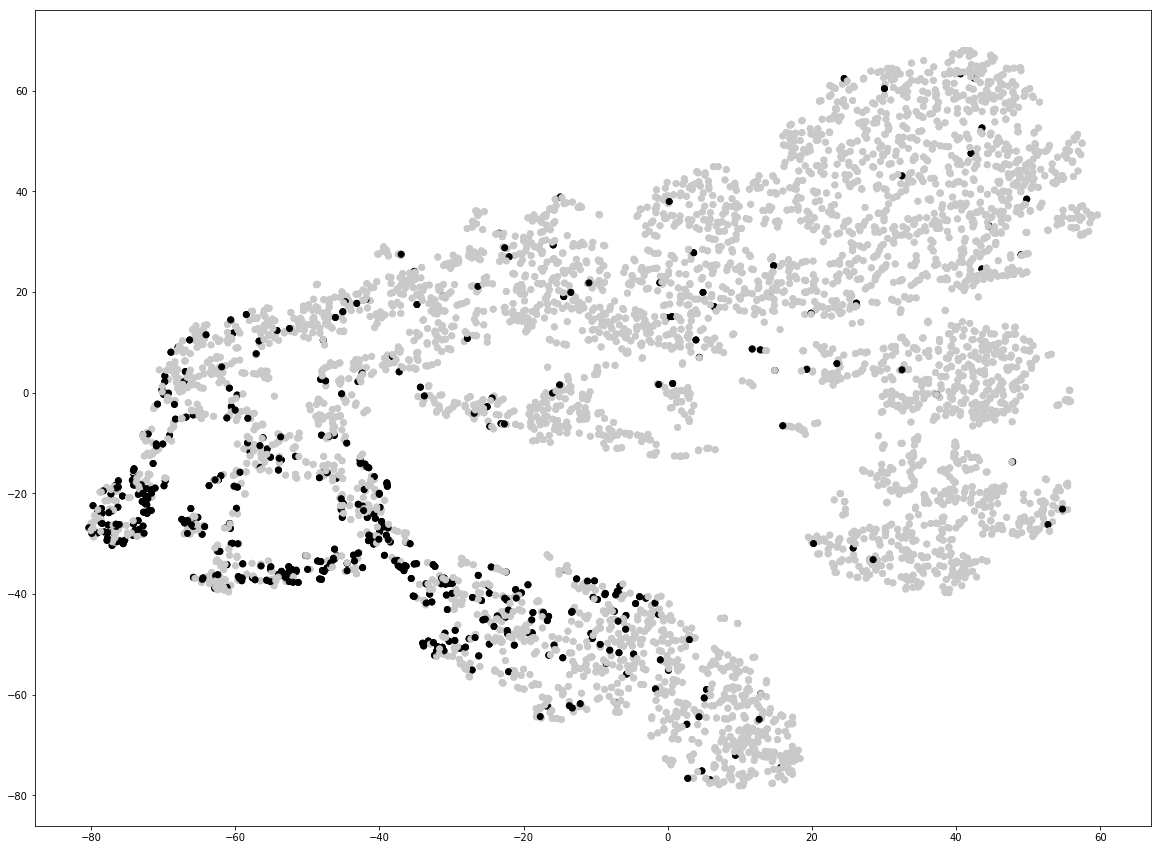

In [17]:
colors = ['#c9c9c9' if yp==y else 'black' for y, yp in zip(labels, pred)]
plt.scatter(Y[:, 0], Y[:, 1], c=colors)
cluster = []
for i, c, x, y in zip(indices, colors, Y[:, 0], Y[:, 1]):
    if c=='black' and x< -60 and y < -10:
        cluster.append(i)
#         plt.annotate(i, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [23]:
clusterzip = zip(alllabels[cluster], allpred[cluster], alltweets[cluster])
for y, yp, t in clusterzip:
    print y, yp, t

[1] [0] ['only white trash watch hockey.']
[0] [1] [" <user>  i've been knowing fag"]
[1] [0] [' <user>  faggot']
[1] [0] [' <user>  fag']
[1] [0] ['apparently not wanting to trade your nitro m<number> in csgo <allcaps>  makes you a collossal faggot.']
[0] [1] [" <user>  coons and monkeys like you disgust me  you minstrel show negro. crying about shit all the time you're a disgrace everywhere"]
[1] [0] ['rt <allcaps>   <user> :  <user>   <user>   <user>   <user>  fuck no id be gettin swole in there like everyday nigger']
[0] [1] [" <user> : drakes new shoes that will be released by nike / jordan. <repeat>  yes  there's glitter on the shoes  <url>  . <repeat> dudes a fag"]
[1] [0] ["rt <allcaps>   <user> : you can't please everyone. and you shouldn't. nothing good comes from having people who say faggot as an insult on your <sym> "]
[1] [0] ['pisses me off so much when brett screams fag or whore out the window at people']
[1] [0] [' <user>  nigger']
[1] [0] ['picture time outside of met

In [24]:
for i, c, x, y in zip(indices, colors, Y[:, 0], Y[:, 1]):
    if c=='black' and -60 < x < -40 and -40 < y < -30:
        print alllabels[i], allpred[i], alltweets[i]

[2] [1] [' <user>  the early bearded man gets the clam ? <hashtag> herkfacts']
[2] [0] [" <user>  let the coons be great it's in the dream"]
[2] [1] ['remember that fear is there to guide you  not cripple you.']
[2] [1] ['rt <allcaps>   <user> : bunch of rappers boutta flood the internets w /  trash remixes']
[2] [0] [' <user>  you havent evolved as a human being. typical meathead redneck. i pity you. you dont know what freedom is about. <repeat> ']
[2] [1] ['rt <allcaps>   <user> : you know how in superhero stories the best insult for superheroes dumb mooks can come up with is do-gooder? <hashtag> whiteknight']
[2] [0] [' <user>  you are hairy like a monkey. : p']
[0] [1] [" <user>   <sym>  <sym>  <sym>  you're a coon"]
[2] [1] ['looks like a tool but is useful as a clay hammer <hashtag> fag  <user>   <url> ']
[2] [1] [' <user>  thank you jackass zebras']
[2] [0] [" <user>   <user>   <user>  btw  genocide isn't war. the people of gaza are no more combatants than the people of the wars

In [25]:
for i, c, x, y in zip(indices, colors, Y[:, 0], Y[:, 1]):
    if c=='black' and -45 < x < -35 and -35 < y < -25:
        print alllabels[i], allpred[i], alltweets[i]

[2] [1] ['rt <allcaps>   <user> : shy girls are undercover freaks. <repeat>  <sym> ']
[2] [1] [' <user>  el negro?']
[2] [1] ["rt <allcaps>   <user> : my bro made out with an ugly chick at a festival while drunk so now he's known as larry bird because he hits threes  <sym> "]
[2] [1] ['remember that fear is there to guide you  not cripple you.']
[2] [1] ['rt <allcaps>   <user> : bunch of rappers boutta flood the internets w /  trash remixes']
[2] [1] [' <user>  thank you jackass zebras']
[2] [1] ['rt <allcaps>   <user> : skin diamond really was the last champion for ebony porn. everything else is kinda trash now.']
[2] [1] [" <user>  lemme just throw a <number> in it  how's the tranny? <repeat> "]
[2] [1] ['thou shall not mock ryan(the future)kelly']
[2] [1] [' <user>  thanks! <repeat>  now go clean that trash can ya lil nasty! lol']
[2] [1] [' <user>  some weird local ghetto school haha']
[2] [1] ['rt <allcaps>   <user> :  <user>  i go on drudge report every day now hoping to see a st

In [26]:
for i, c, x, y in zip(indices, colors, Y[:, 0], Y[:, 1]):
    if c=='black' and -40 < x and y < -30:
        print alllabels[i], allpred[i], alltweets[i]

[1] [2] [' <sym> como se llama el ni <sym> o m <sym> s delgado de jap <sym> n? yocomo poko\n\n <sym>  <sym>  <sym>  <sym>  gino  <sym>  <sym>  <sym>  <sym> ']
[1] [2] ['thank god fob <allcaps>  didnt come back doing some shitty arena tour. <hashtag> iwaited<number>yearsforfobandiallgotwasthisshittyarena sykeeee <allcaps>  <elong> ']
[1] [2] ['these girls going to school with all kind og aquatic colored weaves in their head.fuck going on?']
[1] [2] ['just a casual ghetto family twerk session  <url> ']
[1] [2] ["rt <allcaps>   <user> : to fez: your nipples couldn't be covered by two trash can lids.  <user> "]
[1] [2] ['the ghetto thuged out version of tree of life coming soon. <repeat> ']
[2] [1] [' <user>  el negro?']
[1] [2] ["if only my new local mall wasn't so ghetto"]
[1] [2] [' <user>  wtf mine was just a fried twinkie w powdered sugar i got hoed']
[1] [2] [" <user>  sheet i can't do that too a cripple"]
[0] [2] [" <user>   <user>  you're reading you coon"]
[0] [2] ['poor whitey  <

In [136]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [7]:
print(precision_score(alllabels, allpred, average=None))
print(recall_score(alllabels, allpred, average=None))
print(f1_score(alllabels, allpred, average=None))

[0.49186992 0.94180585 0.8589306 ]
[0.41016949 0.9452593  0.89454976]
[0.44731978 0.94352941 0.87637841]


Normalized confusion matrix
[[0.49 0.45 0.06]
 [0.04 0.94 0.02]
 [0.03 0.11 0.86]]


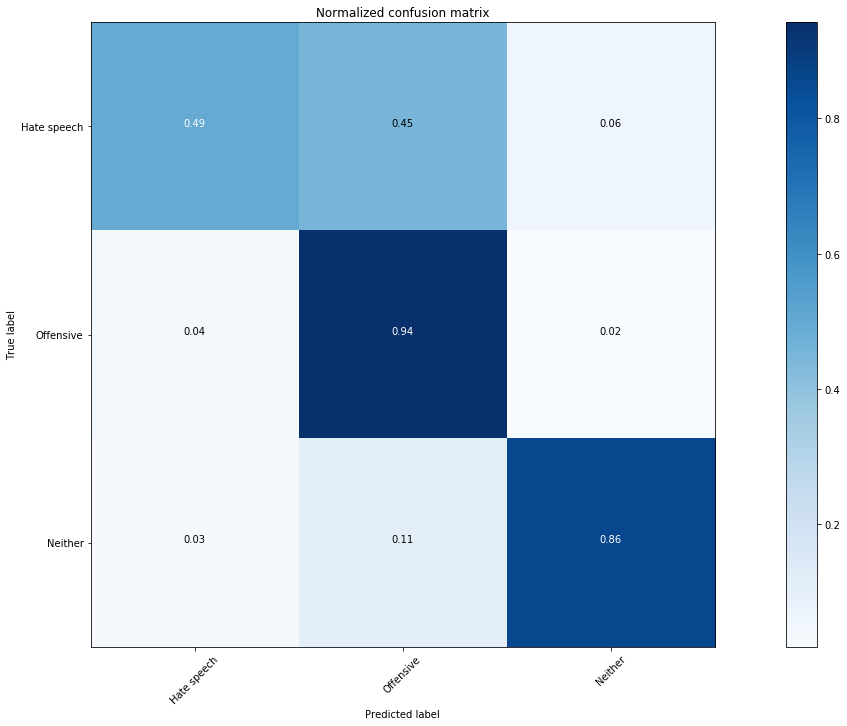

In [138]:
class_names = ['Hate speech', 'Offensive', 'Neither']

# Compute confusion matrix
cnf_matrix = confusion_matrix(allpred, alllabels)
np.set_printoptions(precision=2)

# # Plot non-normalized confusion matrix
# fig = plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
fig = plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

fig.savefig(TEST_PATH + '.cnf.png')

In [11]:
VOCAB_PATH = 'data/twitter_davidson/vocab.dat'
VOCAB_TEST_PATH = 'test/vocab_hate_phrases'
vocab = []
with open(VOCAB_PATH, mode="rb") as f:
    vocab.extend(f.readlines())
vocab = [line.strip('\n') for line in vocab]
print vocab

['<pad>', '<unk>', '<user>', '<allcaps>', '<sym>', 'a', 'bitch', 'rt', 'i', 'the', 'you', 'to', '<repeat>', 'and', 'my', 'that', '<hashtag>', 'bitches', '<url>', 'in', 'is', 'like', 'me', 'of', 'on', 'hoes', 'be', 'this', 'pussy', 'for', 'it', 'hoe', '<number>', 'with', "i'm", 'ass', 'your', 'all', 'up', 'if', 'but', 'just', "don't", 'get', 'fuck', 'so', 'they', 'when', 'these', 'no', 'u', 'got', 'shit', 'nigga', 'not', 'she', 'was', 'are', 'her', 'trash', 'at', 'lol', 'out', 'have', 'about', 'he', "ain't", 'some', 'what', '&am<smile>', 'do', 'know', 'can', 'niggas', 'we', 'them', 'one', 'how', 'love', "it's", 'or', 'who', 'as', 'fucking', 'go', 'yo', 'now', 'want', 'from', 'why', 'bad', "can't", 'then', 'his', 'good', "you're", 'man', 'too', '<elong>', '/', 'off', 'say', 'look', 'make', 'still', 'ya', "that's", 'hate', 'see', 'an', 'im', 'back', 'only', 'think', 'need', 'never', 'time', 'will', 'faggot', 'really', 'girl', 'people', "y'all", 'real', 'right', 'being', 'even', 'would', '

In [4]:
hate_phrases = ["they call you %s" % w for w in vocab]
hate_df = pd.DataFrame(hate_phrases, columns=['tweet'])
hate_df.to_csv(VOCAB_TEST_PATH)

In [17]:
hate_pred_df = pd.read_csv( VOCAB_TEST_PATH+'.pred.csv', header = 0, quoting = 0, index_col = 0 )

In [20]:
hate_idx = hate_pred_df.index[hate_pred_df['0'] == 0].tolist()
print hate_df.iloc[hate_idx]

                                      tweet
118                    they call you faggot
372                   they call you faggots
436                   they call you niggers
537                      they call you fags
542                    they call you racist
1049                    they call you coons
1334                   they call you beaner
1798                  they call you beaners
2099                   they call you queers
2490                  they call you wetback
3241                 they call you jiggaboo
3276                     they call you jews
3450                 they call you wetbacks
3936                   they call you jewish
4343                  they call you wiggers
5554                     they call you nazi
5564                    they call you spics
7141               they call you fatherless
7168                they call you pedophile
7689                 they call you 'believe
8962               they call you alcoholics
10333                they call y